This project is to build a good model for more accurate prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Lasso, LogisticRegression, LinearRegression

In [4]:
df = pd.read_csv('fuel_data.csv')
df.head()

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [5]:
df.index = df.index+1
df.drop('Unnamed: 0',1,inplace=True)
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
1,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
2,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
3,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
4,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
5,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 1 to 29523
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [7]:
df.shape

(29523, 11)

In [16]:
df.rename(columns={'utility_id_ferc1':'utility', 'report_year':'year',
                  'plant_name_ferc1':'plant',
                  'fuel_type_code_pudl':'fuel_code',
                  'fuel_qty_burned':'qty_burned',
                  'fuel_mmbtu_per_unit':'per_unit',
                  'fuel_cost_per_unit_burned': 'per_unit_burned',
                  'fuel_cost_per_unit_delivered': 'per_unit_delivered',
                  'fuel_cost_per_mmbtu': 'per_unit_mmtu'}, inplace=True)

Questions that one can ask from this data.
1. which year had the highest coal  quantity burned
2. show the graph
3. what is the probability that if a fuel code is picked in 2000, that it will be gas
4. show in pie chart

In [31]:
# question 1
coal = df.loc[df['fuel_code']=='coal', ['year', 'qty_burned']]
coal.loc[coal.qty_burned==coal.qty_burned.max(), 'year']

1716    1995
Name: year, dtype: int64

Text(0, 0.5, 'total quantity burned')

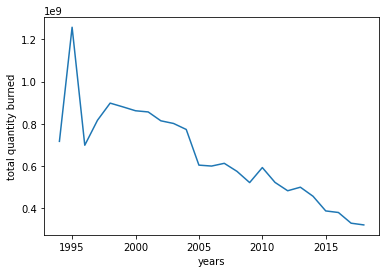

In [34]:
# question 2
yearly_sum = []
for i in coal.year.unique():
    yearly_sum.append(sum(coal.loc[coal.year==i, 'qty_burned']))

plt.plot(coal.year.unique(), yearly_sum)
plt.xlabel('years')
plt.ylabel('total quantity burned')

In [38]:
# question 3
ya= df.loc[df['year']==2000, 'fuel_code'].value_counts()
ya

gas        474
oil        416
coal       403
nuclear     56
waste       14
other       10
Name: fuel_code, dtype: int64

In [39]:
474/sum(ya)

0.3452294246176256

In [42]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
    width : scalar or array-like, optional
        The width(s) of the bars (default: 0.8).
    
    bottom : scalar or array-like, optional
        The y coordinate(s) of the bars bases (default: 0).
    
    align : {'cent

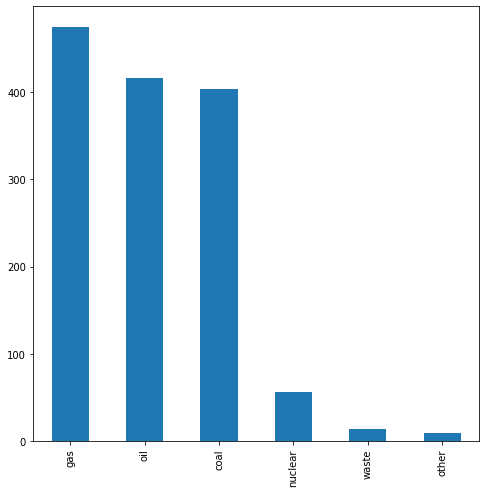

In [64]:
ya.plot(kind = 'bar', figsize= (8,8))


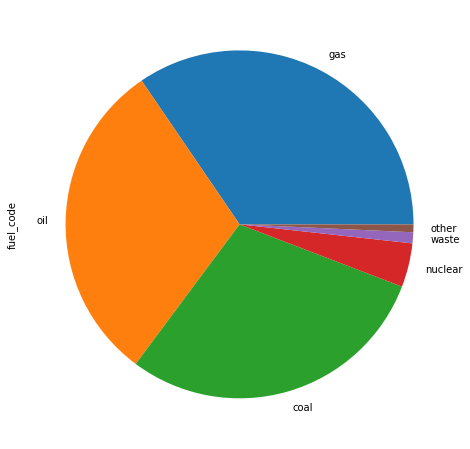

In [46]:
df.fuel_code.loc[df['year']==2000].value_counts().plot(kind='pie', figsize=(8,8))

4. which feul has the highest cost per unit in the 21st century
5. graph it

In [47]:
# question 4

df.columns

Index(['record_id', 'utility', 'year', 'plant', 'fuel_code', 'fuel_unit',
       'qty_burned', 'per_unit', 'per_unit_burned', 'per_unit_delivered',
       'per_unit_mmtu'],
      dtype='object')

In [57]:
fuel = df.loc[df['year']>=2000, ['fuel_code','per_unit']]
totals = []
for i in fuel.fuel_code.unique():
    totals.append(sum(fuel.loc[fuel.fuel_code==i, 'per_unit']))
print(max(totals), fuel.fuel_code.unique()[totals.index(max(totals))])

120369.02284399973 coal


In [55]:
totals

[120369.02284399973,
 42749.95090299991,
 8806.054080000124,
 6838.597726999996,
 3.4401989999999967,
 148.38282300000023]

In [58]:
totals.index(max(totals))

0

Text(0, 0.5, 'per unit')

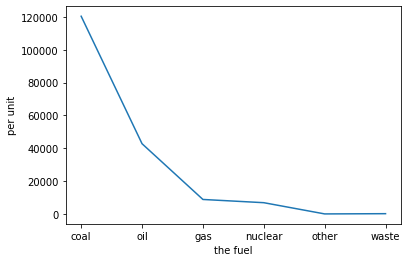

In [59]:
plt.plot(fuel.fuel_code.unique(), totals)
plt.xlabel('the fuel')
plt.ylabel('per unit')

In [67]:
df.head()

,record_id,utility,year,plant,fuel_code,fuel_unit,qty_burned,per_unit,per_unit_burned,per_unit_delivered,per_unit_mmtu
1,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
2,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
3,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
4,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
5,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


6. Which plant produced the most coal
7. Graph the output

In [70]:
l = df.plant.loc[df.fuel_code=='coal'].value_counts()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEA652B948>]],
      dtype=object)

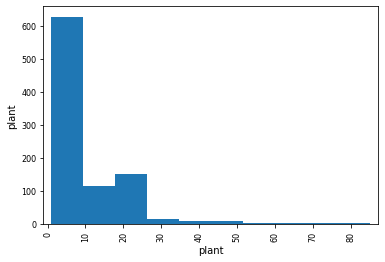

In [77]:
pd.plotting.scatter_matrix(pd.DataFrame(l))

In [75]:
dir(pd.plotting)

['PlotAccessor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_core',
 '_matplotlib',
 '_misc',
 'andrews_curves',
 'autocorrelation_plot',
 'bootstrap_plot',
 'boxplot',
 'boxplot_frame',
 'boxplot_frame_groupby',
 'deregister_matplotlib_converters',
 'hist_frame',
 'hist_series',
 'lag_plot',
 'parallel_coordinates',
 'plot_params',
 'radviz',
 'register_matplotlib_converters',
 'scatter_matrix',
 'table']

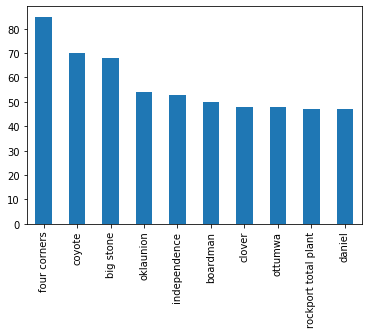

In [80]:
l[:10].plot(kind= 'bar')

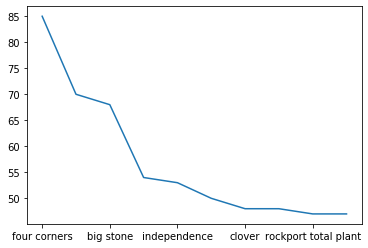

In [82]:
l[:10].plot()